In [62]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cmx
import json
# For color mapping
import matplotlib.colors as colors
from operator import itemgetter
import os
import rpy2.robjects as robjects

#directorio="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"#Redes\\"
#directorio='G:\\Redes\\'
path="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"
version=1

In [4]:
#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

def filtrar_papers(R_n,revista,version):
    paper_conjuntos = []
    
    with open(path+'papers_filtro_'+str(revista)+'_'+str(version)+'.txt','a',encoding='utf-8') as archivo_guardar:
            
        R = open(path+'\mag_papers_'+R_n+'.txt', 'r') 
        N = 10000000
        i = 0
        j=0
        for line in R:
            paper=ast.literal_eval(line)
            try:
                paper['doc_type']
                paper['fos']
                paper['keywords']
                paper['references']
                paper['venue']
                if paper['doc_type']=='Journal' and paper['lang']=='en' and paper['venue'].split()[0]==revista:
                    j+=1
                    paper_conjuntos.append(paper)
                    key='abstract';sacarcampo(paper,key)
                    key='url';sacarcampo(paper,key)
                    key='lang';sacarcampo(paper,key)
                    key='page_start';sacarcampo(paper,key)
                    key='page_end';sacarcampo(paper,key)
                    key='doc_type';sacarcampo(paper,key)
                    key='pdf';sacarcampo(paper,key)
                    json.dump(paper, archivo_guardar, ensure_ascii=False)
                    archivo_guardar.write('\n')
            except KeyError:
                pass
            i+=1
            if i==N:
                break
        R.close()
        print(j)
    archivo_guardar.close()
    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    #paper_conjuntos=filtrar_papers(R_n,'Nature')
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
#ides_out=[]
#ides_in={}
#for i in range(160,167):
#    ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),[])
#    print(i)
    
#ides_in,ides_out=agregar_contar(ides_in,ides_out,str(162),[])

In [5]:
def frequency(Lista):
    grupo={}
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

#### Esta es la rutina que hay que correr sobre los 166 archivos. En promedio va a dar unos 100.000 papers en total, antes de la intersección.

In [6]:
papers_filtrados = []
version=166
for i in range(160,167):
    filtrar_papers(str(i),'Nature',version)
    print(i)
    

KeyboardInterrupt: 

In [7]:
papers_conjuntos = []

R=open(path+'papers_filtro_'+str('Nature')+'_0-166.txt','r',encoding='utf-8')
i=0   
j=0
k=0
for line in R:
    #print(type(str(line)))
    
    if i==1100000:
        break
    
    try:
        paper=ast.literal_eval(line)
        papers_conjuntos.append(paper)
        #print(paper)
        #if i == 100000:
        j+=1   # break
        if paper["year"]==1951 and paper['volume']=='167' and paper['venue']=='Nature' and paper['title'].split()[0]=='Physical':
            #if paper['title']=='Molecular Structure of Nucleic Acids: Molecular Structure of Deoxypentose Nucleic Acids':
            print(paper['title'])
            print(paper['id'])
                        #if i ==10:
            #print(paper)
    except:#invalid character in identifier
        
        try:
            k+=1
            paper=ast.literal_eval(line[1:])
            papers_conjuntos.append(paper)
            #print(paper)
            if paper['year']==1951 and paper['volume']=='167' and paper['venue']=='Nature':#and paper['issue']=='4356':
                print(paper['title']) 
        except:
            pass
    i+=1 #   pass
R.close()
print('total de líneas -'+str(i))
print('total de líneas normales -'+str(j))
print('total de líneas anomalas -'+str(k))
print('total de suma líneas -'+str(j+k))

Physical Studies of Nucleic Acid: Evidence on the Structure of Deoxyribonucleic Acid from Measurements with Polarized Infra-Red Radiation
4e3b2220-f2ab-44fb-a24c-5f3067e876f3
Physical Studies of Nucleic Acid: Nucleic Acid: an Extensible Molecule?
8554533b-f876-40f0-a6a6-b869c94e2907
total de líneas -90273
total de líneas normales -90271
total de líneas anomalas -2
total de suma líneas -90273


In [8]:
ides_out=[]
ides_in={}
ides_in,ides_out=agregar_contar(ides_in,ides_out,1,papers_conjuntos)

### Componente gigante luego de quitar papers

Acá vamos a armar la componente gigante antes de intersecar papers

In [9]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
print(len(interseccion))

38151


In [10]:
version = 1
#interseccion = open(path+'papers_interseccion'+str(version-1)+'.txt','r')
#interseccion.close()
#version=str(version)
def filtrar_paper(G,interseccion):
    i=0
    paper_conjuntos = []
    #R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+version+'.txt','r') 
    R = open(path+"papers_filtro_Nature_0-166.txt","r",encoding="utf-8") 
    archivo_red= open(path+"archivo_red_Nature"+str(version)+".txt","a",encoding="utf-8")
    archivo_year = open(path+'archivo_year_Nature'+str(version)+'.txt','a',encoding='utf-8')
    archivo_venue = open(path+'archivo_venue_Nature'+str(version)+'.txt','a',encoding='utf-8')
    archivo_fos = open(path+'archivo_fos_Nature'+str(version)+'.txt','a',encoding='utf-8')
    archivo_keywords = open(path+'archivo_keywords_Nature'+str(version)+'.txt','a',encoding='utf-8')
    archivo_name = open(path+'archivo_name_Nature'+str(version)+'.txt','a',encoding='utf-8')
    archivo_org = open(path+'archivo_org_Nature'+str(version)+'.txt','a',encoding='utf-8')
    for paper in papers_conjuntos:
        if paper['id'] in interseccion:
            pass
            archivo_year.write(str(paper['id'])+' '+str(paper['year'])+'\n')
            archivo_fos.write(str(paper['id'])+' '+str(paper['fos'])+'\n')
            archivo_venue.write(str(paper['id'])+' '+str(paper['venue'])+'\n')
            try:
                archivo_keywords.write(paper['id']+' '+str(paper['keywords'])+'\n')
            except KeyError:
                pass
            try:
                archivo_name.write(paper['id']+' '+paper['authors'][0]['name']+'\n')
            except KeyError:
                pass
            try:
                archivo_org.write(paper['id']+' '+paper['authors'][0]['org']+'\n')
            except KeyError:
                pass
            
            for cita in paper['references']:
                if cita in interseccion:
                   # pass
                    G.add_edge(paper['id'],cita)  
                    archivo_red.write((paper['id'])+' '+cita+'\n')
    R.close()
    archivo_red.close()
    archivo_year.close()
    archivo_venue.close()
    archivo_fos.close()
    archivo_keywords.close()
    archivo_name.close()
    archivo_org.close()
    print(i)
    return(G)

G=nx.DiGraph()
G=filtrar_paper(G,interseccion)

0


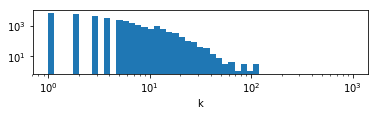

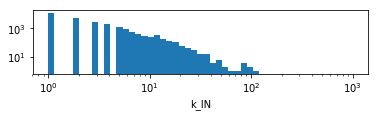

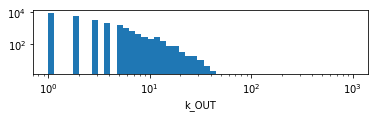

In [11]:
# Distribución de grado
plt.subplot(311)
grados_G = [gra for n,gra in G.degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.subplot(312)
# Distribución de grado IN
grados_G = [gra for n,gra in G.in_degree()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.subplot(313)
# Distribución de grado OUT
grados_G = [gra for n,gra in G.out_degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

In [12]:
GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))
largo=[]
for i in Componentes:
    largo.append(len(i))

In [30]:
(Componentes[1:2][0])

In [32]:
(Componentes[1])

In [67]:
options = {
'node_size': 20,
'width': 0.6,
}
comp=2
Componente=G.subgraph(Componentes[comp:comp+1][0])

#pos=nx.kamada_kawai_layout(Componente)
#nx.draw_networkx(Componente,pos=pos, with_labels=False,**options)
#plt.show()

In [16]:
h,a=nx.hits(Componentes[0],max_iter=1000, tol=1e-08, nstart=None, normalized=True)

In [22]:
h1 = sorted(h.items(), key=lambda kv: kv[1],reverse=True)

In [20]:
np.array(list(a.values()))-np.array(list(h.values()))

array([2.79878221e-24, 2.89203563e-20, 3.29829827e-18, ...,
       7.35600637e-17, 5.32940059e-20, 6.11356041e-22])

In [23]:
h1

[('63b29739-26ee-48cd-a672-c51df7521084', 0.0251906505430799),
 ('6318ef54-455b-4262-b35a-2951d29836ee', 0.023666504086984404),
 ('4c6de68a-ccb3-4b53-99eb-e7493e4e7569', 0.02092097399008862),
 ('0579e5e7-cbe9-46ba-9750-72f7f16ef98e', 0.011179090784054211),
 ('29c360ef-9f89-452a-bf25-3c4202d385e4', 0.011117709799199195),
 ('f88d1977-da7e-4aeb-8582-8bfe813e1b75', 0.010587773016379445),
 ('992c47d1-9a56-4ea7-8dfc-9ed076da7fdf', 0.010429916354069875),
 ('fa1f3207-e037-4d6b-8df9-bc1910c9ac66', 0.010361843560596032),
 ('356038e6-a44f-48c8-9168-60889ab32eb1', 0.008841975059887758),
 ('5297bd7b-9b2f-4673-948c-10afca3ca0ae', 0.008822341176215892),
 ('f1ea7407-b29a-4fb9-890e-48089ef90ccf', 0.008658771089728057),
 ('b735624a-f64e-4ea5-8c42-3c7455a90355', 0.008285858788368485),
 ('7e88f599-7f54-4240-8035-20206476cbb8', 0.00821630217721198),
 ('6430cf95-48c2-48bb-9fa9-f1366b0563c0', 0.008031065240894392),
 ('326fc64b-94ce-4e47-9d4a-482d64bc3338', 0.007941109420374513),
 ('e43929c5-58a2-40ce-9659-42

#### Vamos a ver cuáles son los papers más citados dentro de nature

In [50]:
ides_out=[]
ides_in={}
#for i in range(160,167):
ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),papers_conjuntos)

In [51]:
ides_in

{'01594d8f-587f-44aa-a439-f83d56b626d9': 1,
 '04bc9191-d754-4edf-bd9e-e05a34360024': 2,
 '06ffe52b-1ae0-44ed-98aa-1fbdf4428fcb': 1,
 '07fd7f5b-2cad-4223-85d1-7c8e0a7a09b2': 4,
 '0bd2594e-f708-45b3-aeab-2d499f26d4c1': 2,
 '10d685c3-0e84-4567-8056-c8de48143c8c': 10,
 '10e45492-b2cc-4154-9112-5773347cd77a': 1,
 '12ae75ea-8e11-4737-8d59-e43bb349058d': 1,
 '15c5af19-e9af-43c1-9306-53c50e1a3642': 2,
 '1a43eb5f-8312-47f3-8ca7-17f8157190ab': 1,
 '206dc7c9-a781-4db7-89b9-bfc5080e18d2': 28,
 '2434a01d-29d2-46e9-adef-5653934eed43': 1,
 '24897333-87d2-4588-af01-5dede5651f46': 1,
 '28e20762-31a2-4b9c-9443-4036f277bd41': 3,
 '2b44c7d8-1321-451e-b161-1ba6e84460bd': 3,
 '2c150d15-3e67-4bd1-8047-57a862caa622': 1,
 '300ac395-bab6-4424-bdf5-df60b935964f': 1,
 '31970434-410c-4d6d-aa06-5d445482e741': 1,
 '348ff1e9-4bcd-4d91-9d8a-7cb9459c8350': 1,
 '35f099e5-31ab-4b68-b306-dd7ba6fea04f': 1,
 '373972df-7b3e-4afc-9d0f-49072a53184e': 5,
 '3b009b7b-9f06-4301-b6d9-3524c83d3818': 1,
 '3b417cd7-aa22-48c1-b65b-4024

In [59]:
a=frequency(list(ides_in.values()))

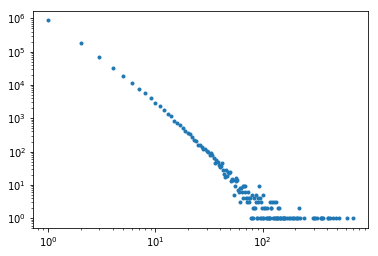

In [61]:
plt.loglog( list(a.keys()),list(a.values()),'.')

In [63]:
b=sorted(a.items())

In [64]:
b

[(1, 865681),
 (2, 180058),
 (3, 67399),
 (4, 32779),
 (5, 18756),
 (6, 11638),
 (7, 7787),
 (8, 5597),
 (9, 4059),
 (10, 2921),
 (11, 2254),
 (12, 1736),
 (13, 1382),
 (14, 1130),
 (15, 807),
 (16, 733),
 (17, 646),
 (18, 506),
 (19, 418),
 (20, 351),
 (21, 327),
 (22, 271),
 (23, 221),
 (24, 202),
 (25, 156),
 (26, 156),
 (27, 136),
 (28, 119),
 (29, 122),
 (30, 105),
 (31, 100),
 (32, 80),
 (33, 93),
 (34, 76),
 (35, 62),
 (36, 44),
 (37, 56),
 (38, 47),
 (39, 39),
 (40, 35),
 (41, 36),
 (42, 45),
 (43, 28),
 (44, 21),
 (45, 17),
 (46, 27),
 (47, 19),
 (48, 24),
 (49, 23),
 (50, 25),
 (51, 13),
 (52, 15),
 (53, 14),
 (54, 5),
 (55, 9),
 (56, 16),
 (57, 13),
 (58, 14),
 (59, 7),
 (60, 6),
 (61, 8),
 (62, 3),
 (63, 8),
 (64, 6),
 (65, 9),
 (66, 4),
 (67, 9),
 (68, 6),
 (69, 9),
 (70, 4),
 (71, 3),
 (72, 4),
 (73, 6),
 (74, 4),
 (75, 3),
 (76, 4),
 (78, 1),
 (79, 1),
 (80, 5),
 (81, 2),
 (82, 1),
 (83, 2),
 (84, 4),
 (85, 2),
 (86, 3),
 (87, 5),
 (88, 1),
 (89, 1),
 (90, 3),
 (91, 4),


#### Localicemos a los papers más citados

Si un paper es citado más de cien veces, imprimir su título, campo, año y revista

In [86]:
j=0
k=0
for i in ides_out:
    
    try: 
        ides_in[i]
        if ides_in[i]>25:
            #pass
            k+=1
            print(str(papers_conjuntos[j]['title'])+'-'+str(papers_conjuntos[j]['year'])+'-'+str(papers_conjuntos[j]['venue']))
            print('# de citas - '+str(ides_in[i]))
    except:
        pass
    j+=1
print(k)

Sparse optical microstimulation in barrel cortex drives learned behaviour in freely moving mice-2008-Nature
# de citas - 32
Sporadic autism exomes reveal a highly interconnected protein network of de novo mutations-2012-Nature
# de citas - 48
Comprehensive molecular portraits of human breast tumours.-2012-Nature
# de citas - 65
The accessible chromatin landscape of the human genome.-2012-Nature
# de citas - 42
Local force and geometry sensing regulate cell functions-2006-Nature Reviews Molecular Cell Biology
# de citas - 34
Foxp3-dependent programme of regulatory T-cell differentiation-2007-Nature
# de citas - 27
Ultrafast graphene photodetector.-2009-Nature Nanotechnology
# de citas - 27
Strong dispersive coupling of a high-finesse cavity to a micromechanical membrane.-2008-Nature
# de citas - 29
Epigenetic regulation of gene expression: how the genome integrates intrinsic and environmental signals-2003-Nature Genetics
# de citas - 31
Engineering a mevalonate pathway in Escherichia co

In [81]:
len(papers_conjuntos)

90272

#### Graficaremos la red ego del hub más grande

In [46]:
def graficar_red_ego(GG):
    # find node with largest degree
    node_and_degree=GG.degree()
    (largest_hub,degree)=sorted(node_and_degree,key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego=nx.ego_graph(GG,'63b29739-26ee-48cd-a672-c51df7521084',undirected=True)
    # Draw graph
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=10,with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx(hub_ego,pos,nodelist=['63b29739-26ee-48cd-a672-c51df7521084'],node_size=100,node_color='r',with_labels=False)
    plt.savefig(path+'ego_graph_2.png')
    plt.show()
    return hub_ego

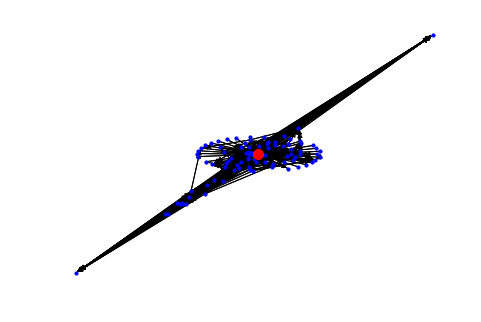

In [48]:
hub_ego=graficar_red_ego(Componente)

Ahora vamos a tratar de usar deteccion de comunidades

In [68]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

In [69]:
labels_infomap = community(Componente, "infomap")

In [70]:
labels_infomap

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

None


C:\Users\Emanuel\Anaconda3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


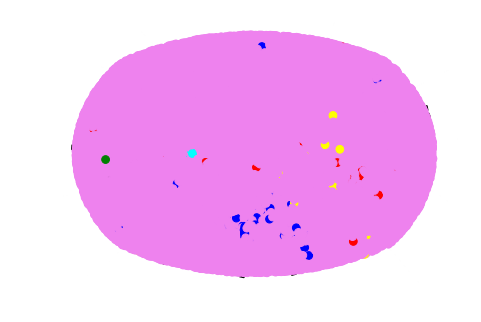

Spring


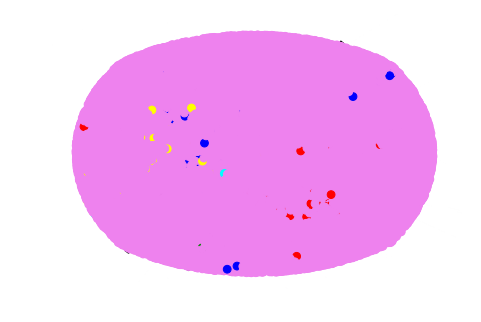

Kamada kawai


MemoryError: 

In [75]:
options = {
'node_size': 20,
'width': 0.6,
}
comp=0
Componente1=G.subgraph(Componentes[comp:comp+1][0])

labels_infomap = community(Componente1, "infomap")

G_im=Componente1.copy()
color_map = []

attributes_im = []
color_map = []
for nom in G_im.nodes():
    attributes_im.append([nom])
    
    
for node in labels_infomap:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    elif node == 5.:
        color_map.append('yellow')    
    else:
        color_map.append('violet')
          
for i in range(len(attributes_im)):
    G_im.nodes[attributes_im[i][0]]['Cluster'] = labels_infomap[i]

options = {
'node_size': 60,
'width': 2,
}

print("None")
nx.draw(G_im,node_color = color_map, **options)
plt.show()

print("Spring")
nx.draw_spring(G_im,node_color = color_map, **options)
plt.show()

print("Kamada kawai")
nx.draw_kamada_kawai(G_im,node_color = color_map, **options)
plt.show()

In [57]:
for i in range(len(papers_conjuntos)):
    if papers_conjuntos[i]['id']=='63b29739-26ee-48cd-a672-c51df7521084' or papers_conjuntos[i]['id']=='6318ef54-455b-4262-b35a-2951d29836ee' or papers_conjuntos[i]['id']=='4c6de68a-ccb3-4b53-99eb-e7493e4e7569':
        print(str(papers_conjuntos[i]['title'])+'-'+str(papers_conjuntos[i]['year']))

Experimental observation of the quantum Hall effect and Berry's phase in graphene.-2005
Two-Dimensional Gas of Massless Dirac Fermions in Graphene-2005
The rise of graphene-2007


In [54]:
grado_hubs=dict(hub_ego.degree())

In [55]:
g_h1 = sorted(grado_hubs.items(), key=lambda kv: kv[1],reverse=True)

In [60]:
len(g_h1)

106